<a href="https://colab.research.google.com/github/AFNANAMIN/AI_Freelancing/blob/master/timeseries_accurate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import math
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [0]:

train=pd.read_csv('dataset.csv')
test=pd.read_csv('validation.csv')
test


,From,Offered_Calls,Type,CW,total
0,2017-01-01,620.961042,65,65,65
1,2017-01-02,3234.682297,146,73,73
2,2017-01-03,3123.350582,222,74,74
3,2017-01-04,2562.125882,296,74,74
4,2017-01-05,2546.663311,370,74,74
5,2017-01-06,2330.958986,438,73,73
6,2017-01-07,1094.231014,497,71,71
7,2017-01-08,589.407457,69,138,69
8,2017-01-09,3292.447954,150,150,75
9,2017-01-10,2968.339816,225,150,75


In [0]:
train.Timestamp = pd.to_datetime(train.From) 
train.index = train.Timestamp 
train = train.resample('D').mean()
test.Timestamp = pd.to_datetime(test.From) 
test.index = test.Timestamp 
test = test.resample('D').mean()
train.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


,Offered_Calls,Type,CW,total
count,1828.000000,1828.000000,1828.000000,1828.00000
mean,4239.069267,303.592451,1961.003829,75.46116
std,2760.275067,175.238759,1238.575717,19.13688
min,0.000000,0.000000,0.000000,0.00000
25%,1994.338808,150.000000,897.500000,73.00000
50%,3527.859809,296.000000,1924.000000,75.00000
75%,6846.785851,445.000000,2952.000000,88.00000
max,11071.761271,672.000000,4888.000000,96.00000


In [0]:
train

,Offered_Calls,Type,CW,total
From,,,,
2012-01-01,656.327485,70,70,70
2012-01-02,6602.360708,166,83,83
2012-01-03,6519.576812,270,90,90
2012-01-04,6701.000518,360,90,90
2012-01-05,6192.670707,435,87,87
2012-01-06,4215.687306,504,84,84
2012-01-07,2982.438424,602,86,86
2012-01-08,2052.472798,86,172,86
2012-01-09,9132.138899,178,178,89


In [0]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train.Offered_Calls, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:        D.Offered_Calls   No. Observations:                 1827
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -16298.134
Method:                       css-mle   S.D. of innovations           1810.031
Date:                Sat, 05 Oct 2019   AIC                          32610.268
Time:                        12:28:48   BIC                          32648.841
Sample:                    01-02-2012   HQIC                         32624.497
                         - 01-01-2017                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2594     12.706     -0.099      0.921     -26.163      23.644
ar.L1.D.Offered_Calls    -0.3692      0.019    -18.977      0.000      -0.407      -0.331
ar.L2.D.

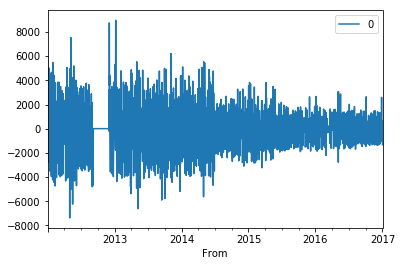

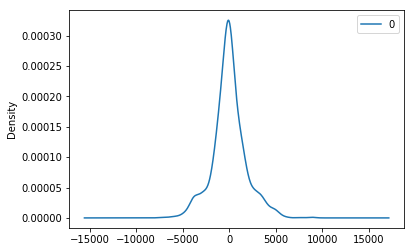

                 0
count  1827.000000
mean      3.817522
std    1813.383108
min   -7379.907219
25%    -897.494848
50%       4.202133
75%     847.771431
max    8969.935356


In [0]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
#The method is suitable for univariate time series without trend and seasonal components.
residuals.plot()#this shows that model do not learn this trend as the series 
plt.show()
residuals.plot(kind='kde')#we get a density plot of the residual error values, suggesting the errors are Gaussian,
#The peak of this graph should always be centered at or around zero. If it is not peaked near zero, 
#it indicates that your forecasting method is biased, meaning it is systematically over- or under-forecasting
plt.show()
print(residuals.describe())

In [0]:
#acc=accuracy_score(test,predictions)
mape = np.mean(np.abs(test - predictions)/np.abs(test))
me = np.mean(predictions - test)
rmse = np.mean((predictions - test)**2)**.5
#corr = np.corrcoef(predictions, test)[0,1]

print(mape)
print(me)
print(rmse)
print(corr)
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('auto-regression')
plt.show()

ValueError: ignored

In [0]:
train = train.Offered_Calls.values
test = test.Offered_Calls.values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
mape = np.mean(np.abs(test - predictions)/np.abs(test))

print('Test MSE: %.3f' % error)
# plot


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 776787.851


In [0]:
fc, se, conf = model_fit.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

AttributeError: ignored

In [0]:
test.total

AttributeError: ignored